In [1]:
%matplotlib inline

import numpy as np
import nibabel
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

import matplotlib
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

import mne
from mne.transforms import apply_trans
from mne.io.constants import FIFF

from pathlib import Path

<OrthoSlicer3D: C:\Users\Lenovo\1stereoEEG\Bukhov\mri\T1.mgz (256, 256, 256)>

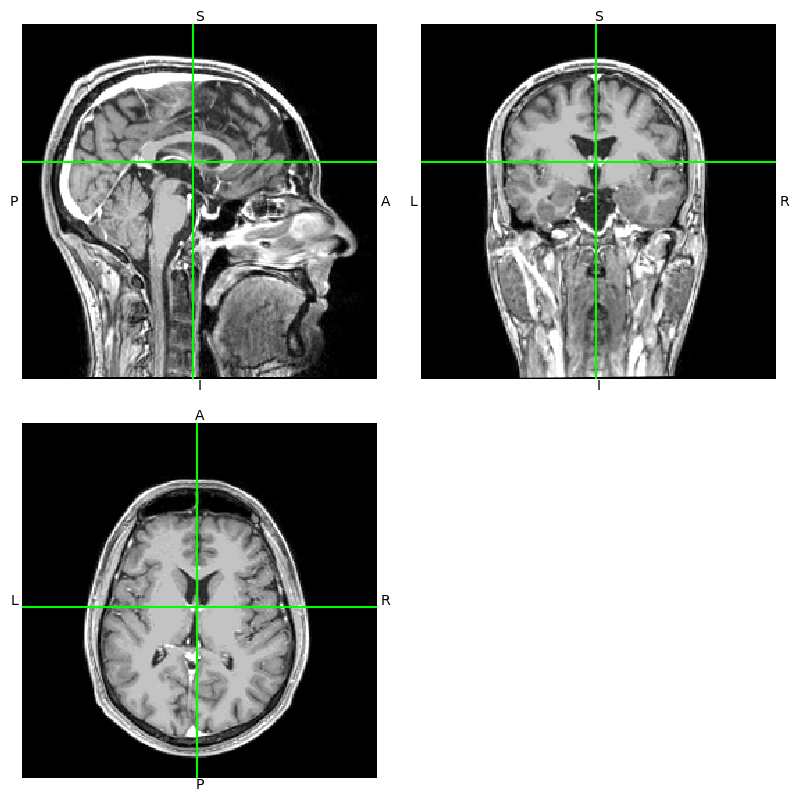

In [2]:
subjects_dir = Path('.')
subject = 'Bukhov'
t1 = nibabel.load("C:\\Users\\Lenovo\\1stereoEEG\\Bukhov\\mri\\T1.mgz")
t1.orthoview()

### Picture ct+mri

In [3]:
fname = "C:\\Users\\Lenovo\\1stereoEEG\\Bukhov\\surf\\rh.white"
rr_mm, tris = mne.read_surface(fname)
print(f'rr_mm.shape == {rr_mm.shape}')
print(f'tris.shape == {tris.shape}')
print(f'rr_mm.max() = {rr_mm.max()}')  # just to show that we are in mm

rr_mm.shape == (135622, 3)
tris.shape == (271240, 3)
rr_mm.max() = 88.19853210449219


In [4]:
your_mesh = mesh.Mesh.from_file('C:\\Users\\Lenovo\\1stereoEEG\\SegmentationMovedCt_Segment_1.stl')
vect = your_mesh.vectors
vect.shape

(5432, 3, 3)

In [6]:
inv_affine = np.linalg.inv(t1.affine)

In [7]:
rr_r = []
tris_r = []
n = 0
for i in vect:
    #первая вершина
    a =  np.round(apply_trans(inv_affine, i[0])).astype(int)
    rr_r.append(a)
    at = n
    n += 1
    #вторая вершина
    b = np.round(apply_trans(inv_affine, i[1])).astype(int)
    rr_r.append(b)
    bt = n
    n += 1
    #третья вершина
    c = np.round(apply_trans(inv_affine, i[2])).astype(int)
    rr_r.append(c)
    ct = n
    n += 1
    tr = np.array([at,bt,ct])
    tris_r.append(tr)
tris_r = np.array(tris_r)
rr_r = np.array(rr_r)
    

In [10]:
#rr_new = np.array([[124, 119, 212], [150,140,233],[103,98,191],[124,118,213]])
#tris_new = np.array([[0,1,2], [1,2,3]])

In [11]:
renderer = mne.viz.backends.renderer.create_3d_figure(
    size=(600, 600), bgcolor='w', scene=False)
gray = (0.5, 0.5, 0.5)
renderer.mesh(*rr_mm.T, triangles=tris, color=gray, opacity=0.3)
renderer.mesh(*rr_r.T, triangles=tris_r, color=(0.7,0.1,0.1), opacity=1)
renderer.sphere(radius=10, center=(124, 119, 212), color=(0.7,0.1,0.1), scale=3)
#renderer.mesh(*rr_new.T, triangles=tris_new, color=(0.7,0.1,0.1), opacity=1)
#view_kwargs = dict(elevation=90, azimuth=0)  # camera at +X with +Z up
mne.viz.set_3d_view(
    figure=renderer.figure, distance=350, focalpoint=(0., 0., 40.))
renderer.show()

Using pyvistaqt 3d backend.



### picture with noxel

In [24]:
fiducials = mne.coreg.get_mni_fiducials(subject, subjects_dir=subjects_dir)
nasion_mri = [d for d in fiducials if d['ident'] == FIFF.FIFFV_POINT_NASION][0]
print(nasion_mri)  # note it's in Freesurfer MRI coords

<DigPoint |     Nasion : (4.0, 84.2, 9.5) mm       : MRI (surface RAS) frame>


In [25]:
nasion_mri = nasion_mri['r'] * 1000  # meters → millimeters
nasion_vox = np.round(
    apply_trans(np.linalg.inv(Torig), nasion_mri)).astype(int)
print(nasion_vox)

[124 119 212]


In [26]:
nasion_vox = [124, 119, 212]

In [27]:
renderer = mne.viz.backends.renderer.create_3d_figure(
    size=(600, 600), bgcolor='w', scene=False)
gray = (0.5, 0.5, 0.5)
renderer.mesh(*rr_mm.T, triangles=tris, color=gray, opacity=0.3)
renderer.mesh(*rr_r.T, triangles=tris_r, color=(0.7,0.1,0.1), opacity=1)
renderer.sphere(radius=10, center=(124, 119, 212), color=(0.7,0.1,0.1), scale=1)
#renderer.mesh(*rr_new.T, triangles=tris_new, color=(0.7,0.1,0.1), opacity=1)
#view_kwargs = dict(elevation=90, azimuth=0)  # camera at +X with +Z up
mne.viz.set_3d_view(
    figure=renderer.figure, distance=350, focalpoint=(0., 0., 40.))
renderer.show()

In [19]:
fiducials = mne.coreg.get_mni_fiducials(subject, subjects_dir=subjects_dir)
nasion_mri = [d for d in fiducials if d['ident'] == FIFF.FIFFV_POINT_NASION][0]
print(nasion_mri)  # note it's in Freesurfer MRI coords

<DigPoint |     Nasion : (4.0, 84.2, 9.5) mm       : MRI (surface RAS) frame>


##### Draft

In [29]:
brain.__dict__

{'_hemis': ('lh',),
 '_view_layout': 'vertical',
 '_title': 'fsaverage',
 '_interaction': 'trackball',
 '_bg_color': (1.0, 1.0, 1.0),
 '_fg_color': (0.0, 0.0, 0.0),
 '_subplot_shape': (1, 1),
 'time_viewer': False,
 '_hash': 1670240665414227900,
 '_block': False,
 '_hemi': 'lh',
 '_units': 'mm',
 '_alpha': 1.0,
 '_subject': 'fsaverage',
 '_subjects_dir': 'C:\\Users\\Lenovo\\1stereoEEG',
 '_views': ['lateral'],
 '_times': None,
 '_vertex_to_label_id': {},
 '_annotation_labels': {},
 '_labels': {'lh': [], 'rh': []},
 '_unnamed_label_id': 0,
 '_annots': {'lh': [], 'rh': []},
 '_layered_meshes': {'lh': <mne.viz._3d_overlay._LayeredMesh at 0x18d3cddca90>},
 '_actors': {},
 '_elevation_rng': [15, 165],
 '_lut_locked': None,
 '_cleaned': False,
 '_silhouette': {'color': (1.0, 1.0, 1.0),
  'line_width': 2,
  'alpha': 1.0,
  'decimate': 0.9},
 'silhouette': False,
 '_scalar_bar': None,
 '_time_label_added': False,
 '_data': {'lh': {'foci': array([[-59.79425523,  -5.47263579,  -4.68416025]])}},


In [30]:
brain._data

{'lh': {'foci': array([[-59.79425523,  -5.47263579,  -4.68416025]])}}